We will be using the files_for_lab/customer_churn.csv dataset to build a churn predictor.

In [87]:
import imblearn  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

1. Load the dataset and explore the variables.

In [4]:
data = pd.read_csv('files_for_lab/customer_churn.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
data.columns = data.columns.str.lower()

In [13]:
data.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [34]:
data.describe()

,seniorcitizen,tenure,monthlycharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
data.gender.value_counts()
data.seniorcitizen.value_counts()
data.partner.value_counts()
data.dependents.value_counts()
data.tenure.value_counts()
data.phoneservice.value_counts()
data.multiplelines.value_counts()
data.internetservice.value_counts()
data.onlinesecurity.value_counts()
data.onlinebackup.value_counts()
data.deviceprotection.value_counts()
data.techsupport.value_counts()
data.streamingtv.value_counts()
data.streamingmovies.value_counts()
data.contract.value_counts()
data.paperlessbilling.value_counts()
data.paymentmethod.value_counts()
data.monthlycharges.value_counts()
data.totalcharges.value_counts()
data.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [35]:
data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [36]:
#change target variable 'churn' to binomial

def to_binomial(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    
    
data.churn = data.churn.apply(to_binomial)

In [37]:
data.churn

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn, Length: 7043, dtype: int64

In [ ]:
#drop customer ID

In [ ]:
#clean and change to binomial
#MultipleLines('no phone service to no')
#onlinesecurity(No internet service -> No)
#onlinebackup (No internet service -> No)
#deviceprotection (No internet service -> No)
#techsupport (No internet service -> No)
#streaming tv, streamingmovies, 

In [ ]:
#categoricals to encode: contract, paymentmethod

In [ ]:
# gender- change female to 1 and male to 0 and rename 'female'
# change yes to 1 and no to 0: partner, dependents, paperlessbilling, churn


In [ ]:
#numericals: tenure, monthlycharges, totalcharges

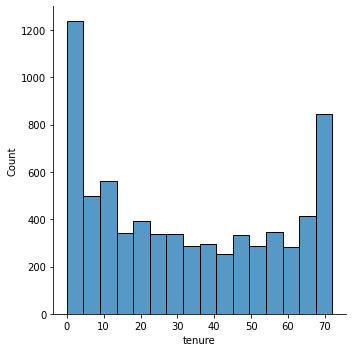

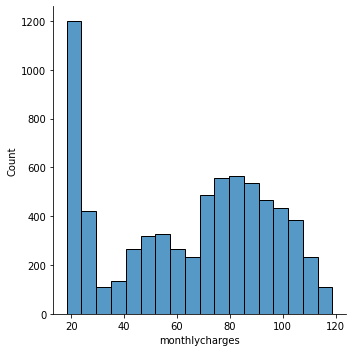

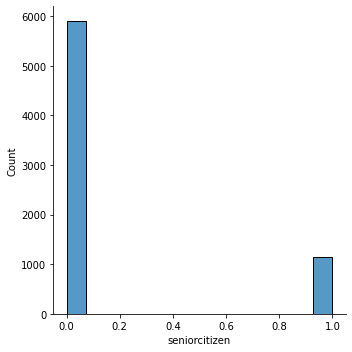

In [45]:
display(sns.displot(data.tenure))
display(sns.displot(data.monthlycharges))
display(sns.displot(data.seniorcitizen))

2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [47]:
data2 = data[['tenure', 'seniorcitizen', 'monthlycharges', 'churn']]
data2

,tenure,seniorcitizen,monthlycharges,churn
0,1,0,29.85,0
1,34,0,56.95,0
2,2,0,53.85,1
3,45,0,42.30,0
4,2,0,70.70,1
...,...,...,...,...
7038,24,0,84.80,0
7039,72,0,103.20,0
7040,11,0,29.60,0
7041,4,1,74.40,1


In [64]:
data.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

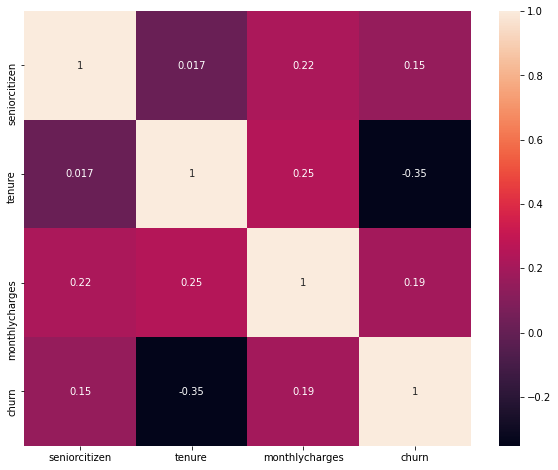

In [94]:
corr_matrix=data.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

3. Extract the target variable.

In [48]:
y = data2['churn']

4. Extract the independent variables and scale them.

In [49]:
X = data2.drop(['churn'], axis=1)

In [ ]:
#train-test split before scaling

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [62]:
transformer = StandardScaler().fit(X_train)
X_scaled = pd.DataFrame(transformer.transform(X_train),columns=X_train.columns)
X_scaled.head()

,tenure,seniorcitizen,monthlycharges
0,-0.340191,-0.435476,-0.514314
1,0.883210,2.296336,0.017840
2,-1.196572,-0.435476,-0.819594
3,1.168670,-0.435476,-1.483535
4,-0.829552,-0.435476,0.658427


5. Build the logistic regression model.

In [63]:
LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train, y_train)


0.7825099375354913

In [69]:
#scale the X-test data
Xtest_scaled = pd.DataFrame(transformer.transform(X_test),columns=X_test.columns)


In [71]:
logits = np.log(1/LR.predict_proba(X_scaled)[:,1]-1)

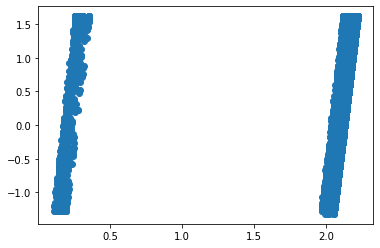

In [72]:
plt.scatter(logits,X_scaled['tenure'])

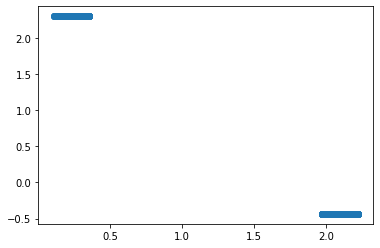

In [73]:
plt.scatter(logits,X_scaled['seniorcitizen'])

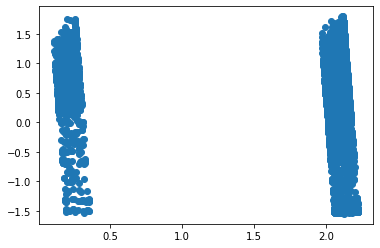

In [74]:
plt.scatter(logits,X_scaled['monthlycharges'])

6. Evaluate the model.

In [76]:
LR.score(Xtest_scaled, y_test)
#score is .737 which is not great considering the data set contained 73.5% negative 'churn' values

0.7370812038614424

In [77]:
LR.score(X_test, y_test)
#but score is better when X_test data is not scaled...?

0.7825099375354913

In [81]:
pred = LR.predict(X_test)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.615606936416185
recall:  0.46004319654427644
f1:  0.526576019777503


In [82]:
confusion_matrix(y_test,pred)

array([[1165,  133],
       [ 250,  213]])

7. Even a simple model will give us more than 70% accuracy. Why?

In [78]:
data.churn.value_counts()

0    5174
1    1869
Name: churn, dtype: int64

In [ ]:
# The data is imbalanced at 73.5% negative outcomes and 26.5% positive outcomes. 
# Even if the model predicted all negative outcomes, it would be correct 73% of the time.

8.   Synthetic Minority Oversampling TEchnique (SMOTE) is an over sampling technique based on nearest neighbors that adds new points between existing points. Apply imblearn.over_sampling.SMOTE to the dataset. Build and evaluate the logistic regression model. Is it there any improvement?


In [89]:
sm = SMOTE(random_state=100,k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_scaled,y_train)

In [90]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(Xtest_scaled)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))

precision:  0.4776978417266187
recall:  0.7170626349892009
f1:  0.5734024179620035


In [93]:
LR.score(Xtest_scaled, y_test)  

0.7194775695627484

In [91]:
confusion_matrix(y_test,pred)

array([[935, 363],
       [131, 332]])

#Accuracy and precision have decreased but recall and f1 have increased. True and false negatives have decrease but true and false positives have increase. In this case we are building a churn predictor so it is probably preferred to overpredict positive churn than underpredict negative churn. 